In [72]:
# imports
import torch
from torch import nn 
from torch.utils.data import DataLoader 
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [73]:
# Download and state traning sets
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [74]:
batch_size = 64

#create DataLoaders
train_DT = DataLoader(training_data, batch_size=batch_size)
test_DT = DataLoader(test_data, batch_size=batch_size)

for X, y in test_DT:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y : {y.shape} {y.dtype}")
    break 


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y : torch.Size([64]) torch.int64


In [75]:
labels_map = {
    0: "T-shirt",
    1: "Trousers",
    2: "Pullover", 
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

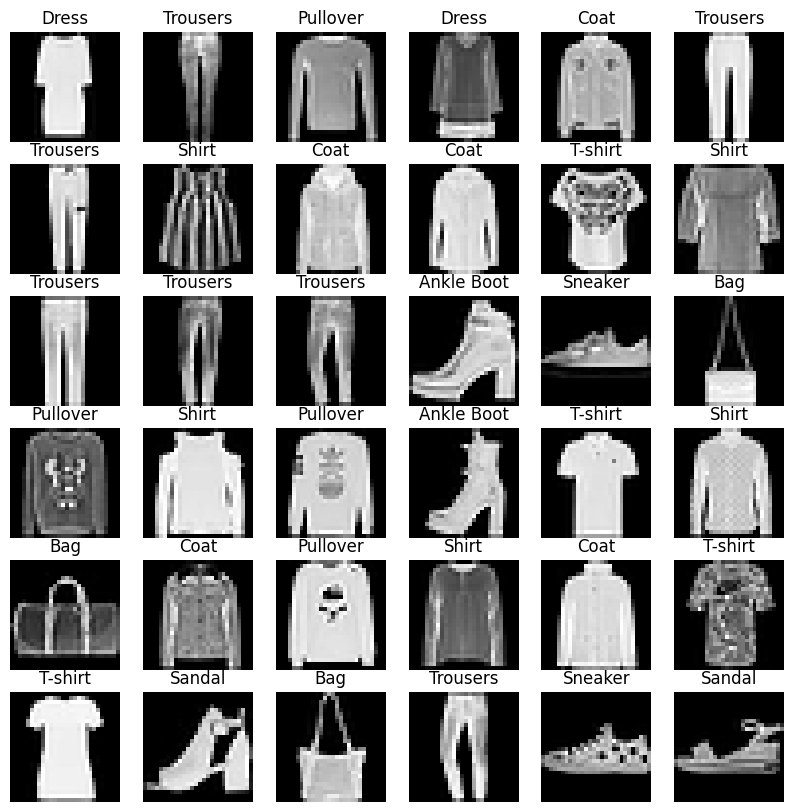

In [76]:
figure = plt.figure(figsize=(10,10))
cols, rows = 6, 6
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [77]:
# Short Neural Network

device=("cpu")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [79]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch+1)*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [80]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/= num_batches
    correct /= size
    print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [81]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n------------------------")
    train(train_DT, model, loss_fn, optimizer)
    test(test_DT, model, loss_fn)
print("Done")

Epoch 1
------------------------
loss: 2.309703 [   64/60000]


loss: 2.289791 [ 6464/60000]
loss: 2.268672 [12864/60000]
loss: 2.257575 [19264/60000]
loss: 2.248666 [25664/60000]
loss: 2.220287 [32064/60000]
loss: 2.226889 [38464/60000]
loss: 2.195109 [44864/60000]
loss: 2.175732 [51264/60000]
loss: 2.146537 [57664/60000]
Test error: 
 Accuracy: 43.6%, Avg loss: 2.141817 

Epoch 2
------------------------
loss: 2.155056 [   64/60000]
loss: 2.140342 [ 6464/60000]
loss: 2.073145 [12864/60000]
loss: 2.089751 [19264/60000]
loss: 2.037602 [25664/60000]
loss: 1.982283 [32064/60000]
loss: 2.007215 [38464/60000]
loss: 1.923077 [44864/60000]
loss: 1.922556 [51264/60000]
loss: 1.849065 [57664/60000]
Test error: 
 Accuracy: 53.9%, Avg loss: 1.846993 

Epoch 3
------------------------
loss: 1.885263 [   64/60000]
loss: 1.853418 [ 6464/60000]
loss: 1.723923 [12864/60000]
loss: 1.770927 [19264/60000]
loss: 1.666680 [25664/60000]
loss: 1.623024 [32064/60000]
loss: 1.645654 [38464/60000]
loss: 1.547169 [44864/60000]
loss: 1.572442 [51264/60000]
loss: 1.474028 [57